In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [7]:
df = pd.read_csv("../data/crime_dataset_india.csv")

In [8]:
df.head()

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,1,02-01-2020 00:00,01-01-2020 00:00,01-01-2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN
1,2,01-01-2020 19:00,01-01-2020 01:00,01-01-2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN
2,3,02-01-2020 05:00,01-01-2020 02:00,01-01-2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN
3,4,01-01-2020 05:00,01-01-2020 03:00,01-01-2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29-04-2020 05:00
4,5,01-01-2020 21:00,01-01-2020 04:00,01-01-2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,08-01-2020 21:00


In [9]:
df.tail()

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
40155,40156,01-08-2024 16:00,07-31-2024 03:00,31-07-2024 05:05,Kolkata,312,COUNTERFEITING,78,F,Firearm,Other Crime,12,No,NaN
40156,40157,31-07-2024 14:00,07-31-2024 04:00,31-07-2024 04:14,Mumbai,300,ILLEGAL POSSESSION,75,F,NaN,Other Crime,2,Yes,29-09-2024 14:00
40157,40158,02-08-2024 03:00,07-31-2024 05:00,31-07-2024 21:33,Kanpur,423,VEHICLE - STOLEN,68,M,Other,Violent Crime,6,No,NaN
40158,40159,01-08-2024 19:00,07-31-2024 06:00,31-07-2024 11:05,Patna,311,SEXUAL ASSAULT,11,M,Blunt Object,Violent Crime,1,No,NaN
40159,40160,31-07-2024 17:00,07-31-2024 07:00,31-07-2024 17:19,Delhi,193,DOMESTIC VIOLENCE,43,F,Poison,Violent Crime,7,Yes,28-09-2024 17:00


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40160 entries, 0 to 40159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Report Number       40160 non-null  int64 
 1   Date Reported       40160 non-null  object
 2   Date of Occurrence  40160 non-null  object
 3   Time of Occurrence  40160 non-null  object
 4   City                40160 non-null  object
 5   Crime Code          40160 non-null  int64 
 6   Crime Description   40160 non-null  object
 7   Victim Age          40160 non-null  int64 
 8   Victim Gender       40160 non-null  object
 9   Weapon Used         34370 non-null  object
 10  Crime Domain        40160 non-null  object
 11  Police Deployed     40160 non-null  int64 
 12  Case Closed         40160 non-null  object
 13  Date Case Closed    20062 non-null  object
dtypes: int64(4), object(10)
memory usage: 4.3+ MB


In [11]:
df.describe()

,Report Number,Crime Code,Victim Age,Police Deployed
count,40160.000000,40160.000000,40160.00000,40160.000000
mean,20080.500000,349.360259,44.49126,10.006250
std,11593.337742,144.169205,20.22555,5.467951
min,1.000000,100.000000,10.00000,1.000000
25%,10040.750000,225.000000,27.00000,5.000000
50%,20080.500000,349.000000,44.00000,10.000000
75%,30120.250000,474.000000,62.00000,15.000000
max,40160.000000,599.000000,79.00000,19.000000


In [12]:
df.isna().sum()

Report Number             0
Date Reported             0
Date of Occurrence        0
Time of Occurrence        0
City                      0
Crime Code                0
Crime Description         0
Victim Age                0
Victim Gender             0
Weapon Used            5790
Crime Domain              0
Police Deployed           0
Case Closed               0
Date Case Closed      20098
dtype: int64

In [13]:
df['Date Reported']=df['Date Reported'].str.split(' ').str[0]

In [14]:
df['Date of Occurrence'] = df['Date of Occurrence'].str.split(' ').str[0]

In [15]:
df['Time of Occurrence'] = df['Time of Occurrence'].str.split(' ').str[-1]

In [16]:
df['Date Reported'] = pd.to_datetime(df['Date Reported'], dayfirst=True, errors='coerce')
df['Date of Occurrence'] = pd.to_datetime(df['Date of Occurrence'], dayfirst=True, errors='coerce')
df['Time of Occurrence'] = pd.to_datetime(df['Time of Occurrence'], format='%H:%M', errors='coerce').dt.time
df['Date Case Closed'] = df['Date Case Closed'].str.split(' ').str[0]
df['Date Case Closed'] = pd.to_datetime(df['Date Case Closed'], dayfirst=True, errors='coerce')

In [17]:
df.head()

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,1,2020-01-02,2020-01-01,01:11:00,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaT
1,2,2020-01-01,2020-01-01,06:26:00,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaT
2,3,2020-01-02,2020-01-01,14:30:00,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaT
3,4,2020-01-01,2020-01-01,14:46:00,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,2020-04-29
4,5,2020-01-01,2020-01-01,16:51:00,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,2020-01-08


In [18]:
df.duplicated().sum()

np.int64(0)

In [19]:
df["Crime Domain"].value_counts()

Crime Domain
Other Crime         22948
Violent Crime       11472
Fire Accident        3825
Traffic Fatality     1915
Name: count, dtype: int64

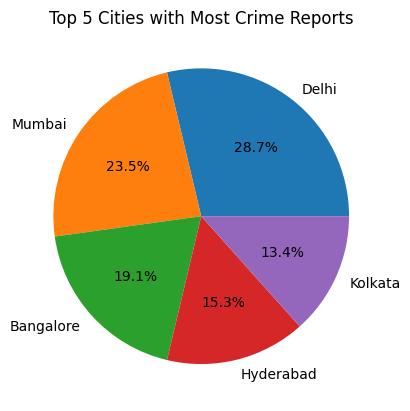

In [20]:
import matplotlib.pyplot as plt
top_5_cities = df['City'].value_counts().head(5)
labels = top_5_cities.index  

plt.pie(top_5_cities, labels=labels, autopct='%1.1f%%')
plt.title("Top 5 Cities with Most Crime Reports")
plt.show()

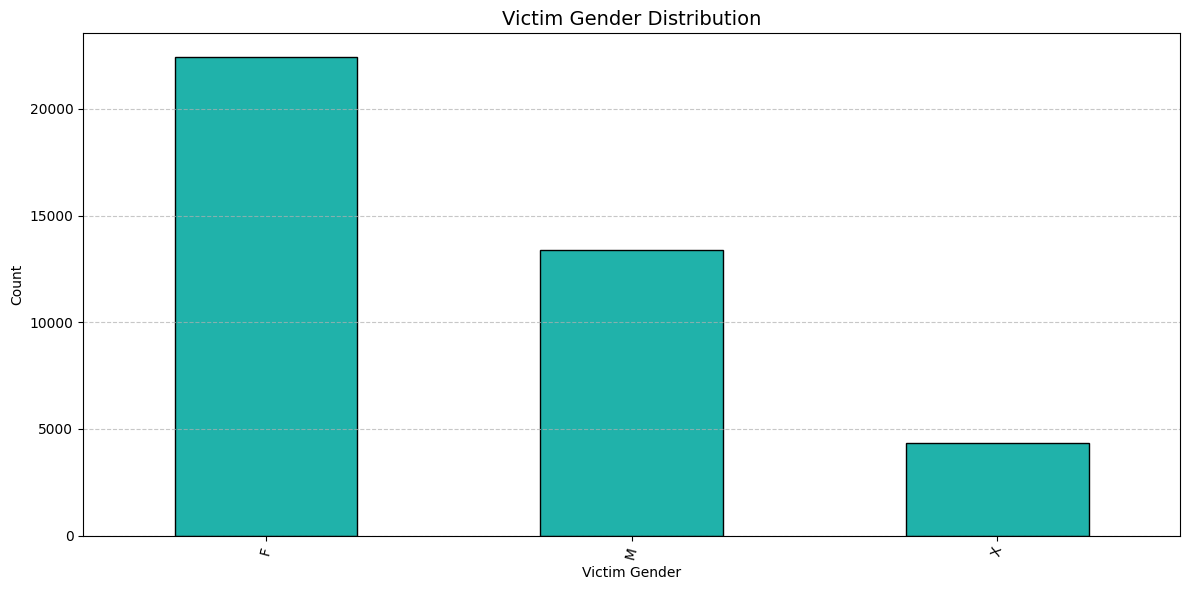

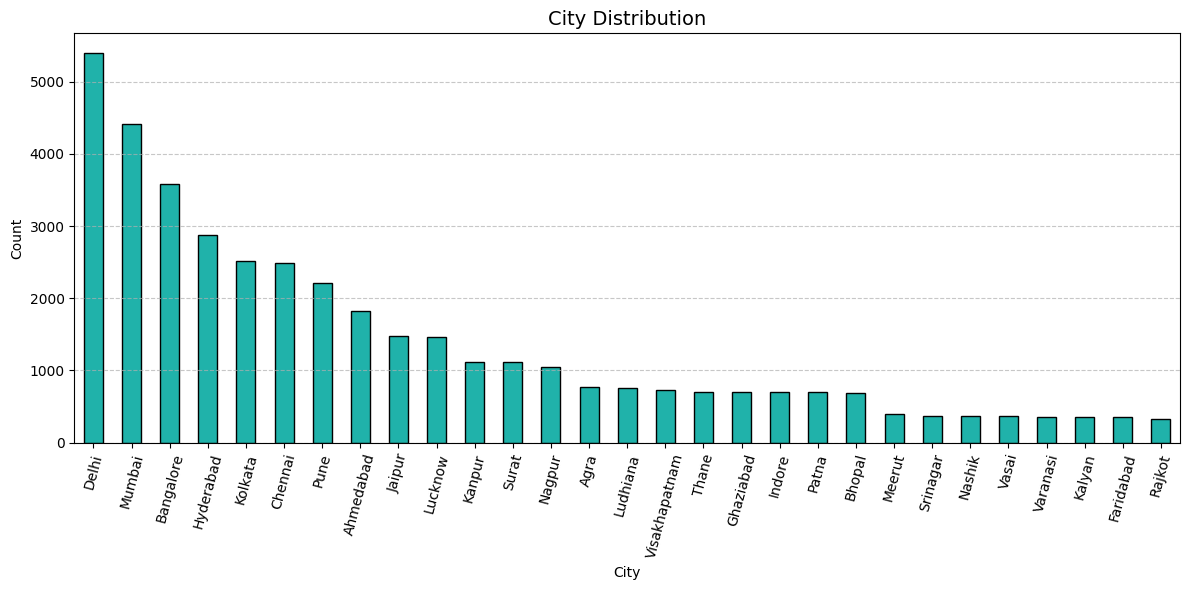

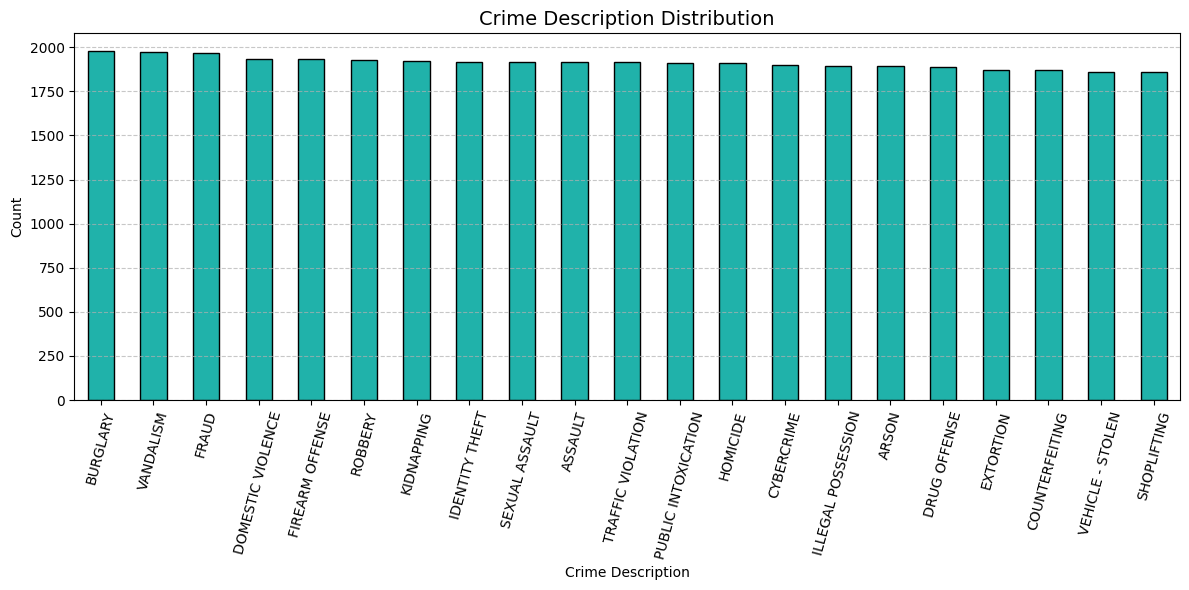

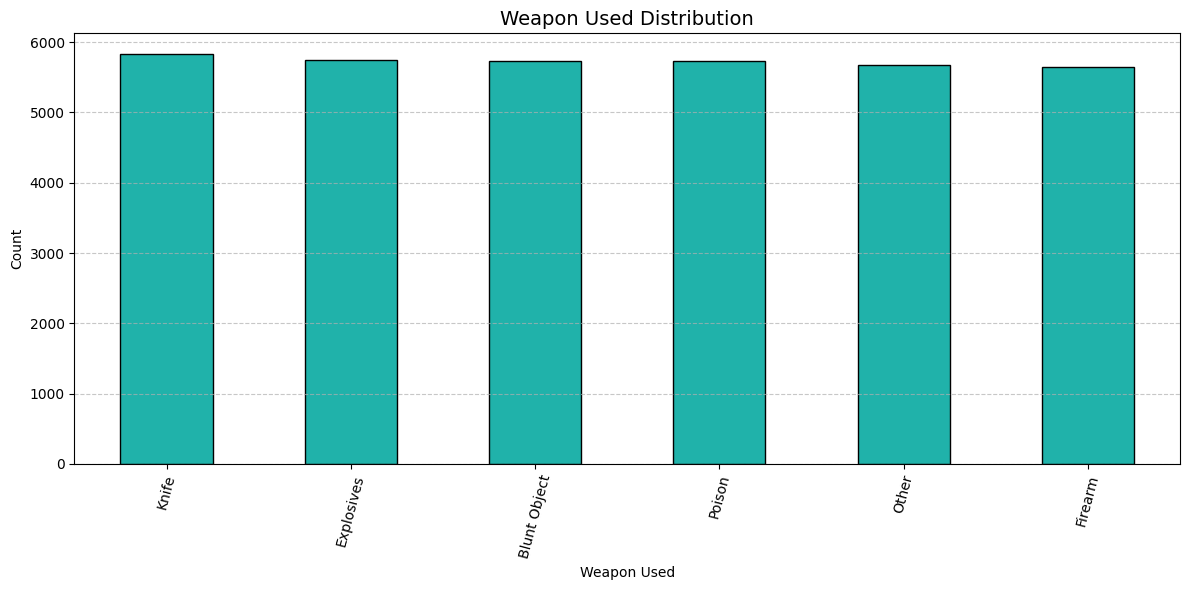

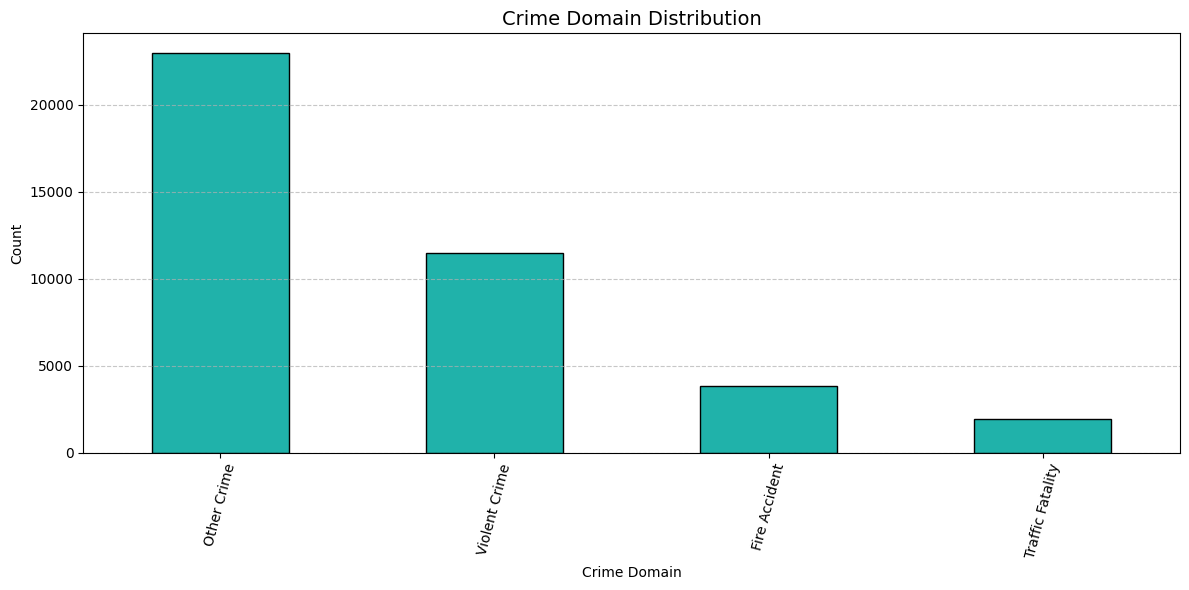

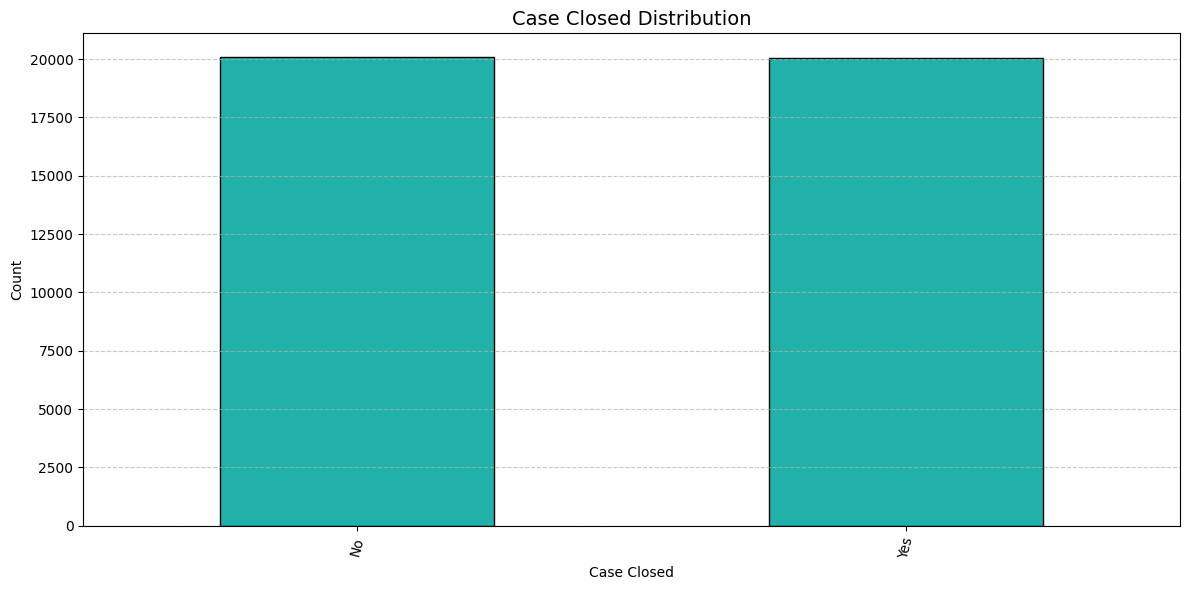

In [21]:
cols_to_plot = ['Victim Gender', 'City', 'Crime Description','Weapon Used', 'Crime Domain', 'Case Closed']

for col in cols_to_plot:
    plt.figure(figsize=(12, 6))
    df[col].value_counts().plot(
        kind='bar', 
        color='lightseagreen', 
        edgecolor='black'
    )
    
    plt.title(f'{col} Distribution', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=75)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

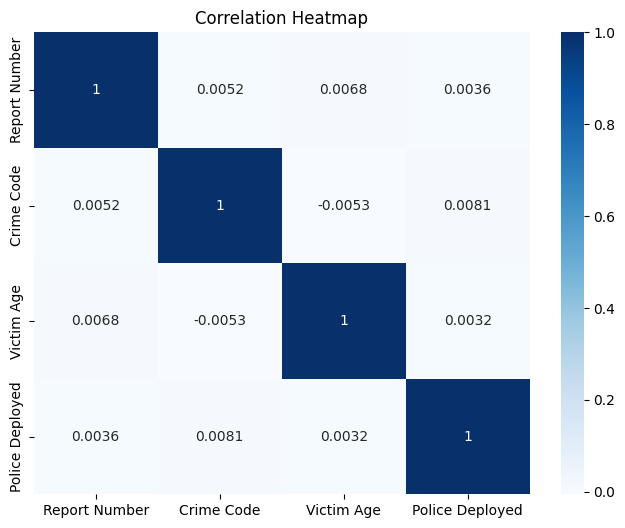

In [22]:
num_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = num_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()

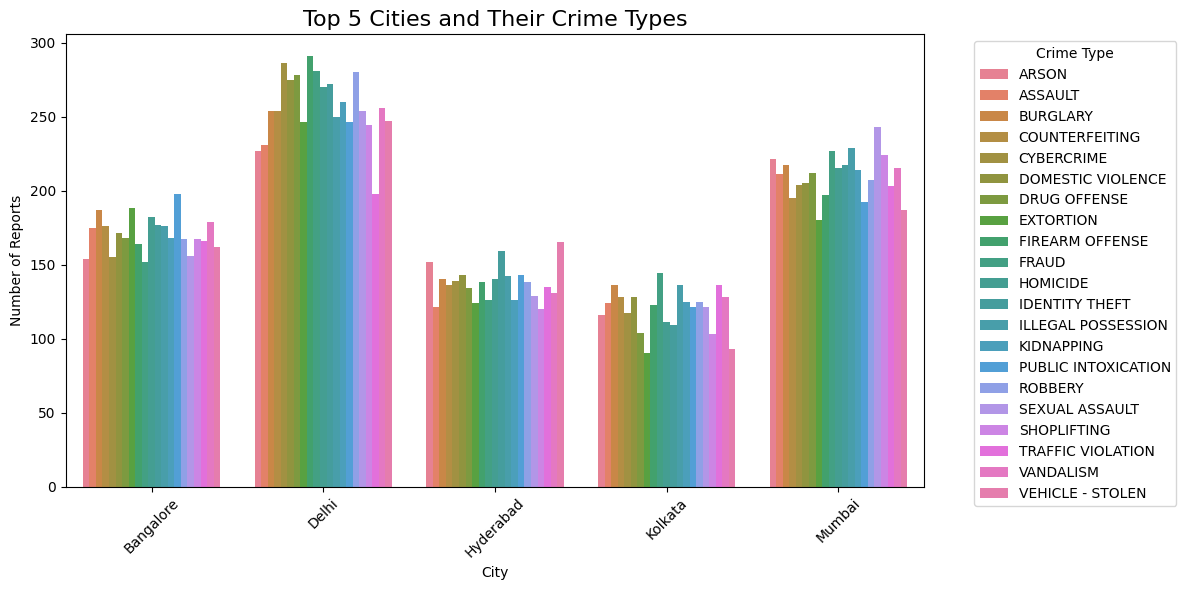

In [23]:
top_5_cities = df['City'].value_counts().head(5).index

filtered = df[df['City'].isin(top_5_cities)]

counts = filtered.groupby(['City', 'Crime Description']).size().reset_index(name='Count')

plt.figure(figsize=(12,6))
sns.barplot(data=counts, x='City', y='Count', hue='Crime Description')
plt.title("Top 5 Cities and Their Crime Types", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Number of Reports")
plt.xlabel("City")
plt.legend(title="Crime Type", bbox_to_anchor=(1.05, 1), loc='upper left')  # move legend outside
plt.tight_layout()
plt.show()

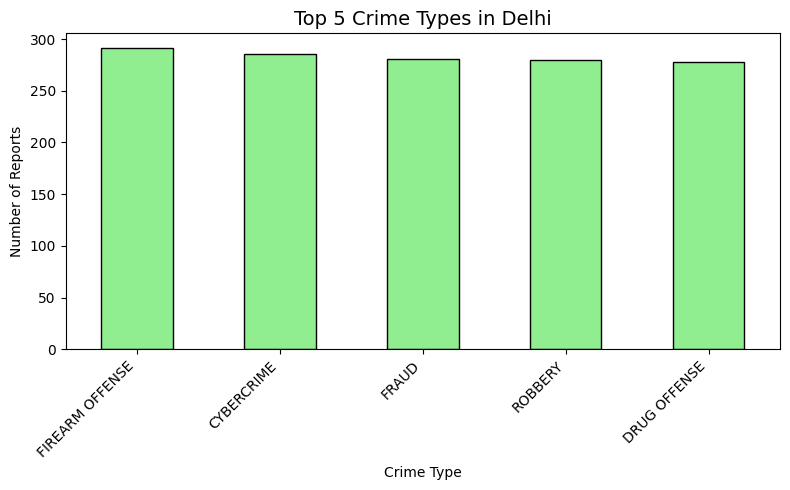

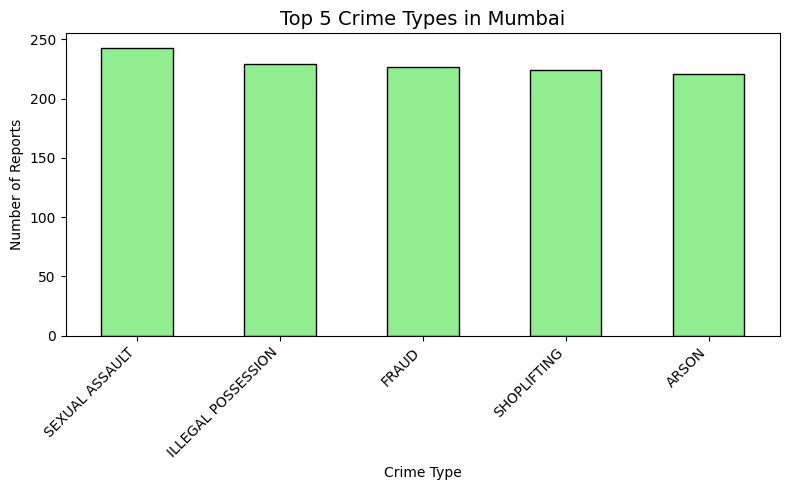

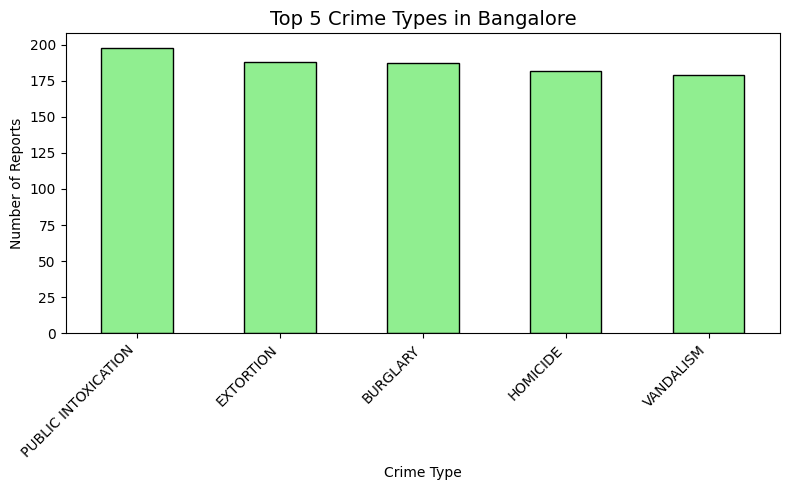

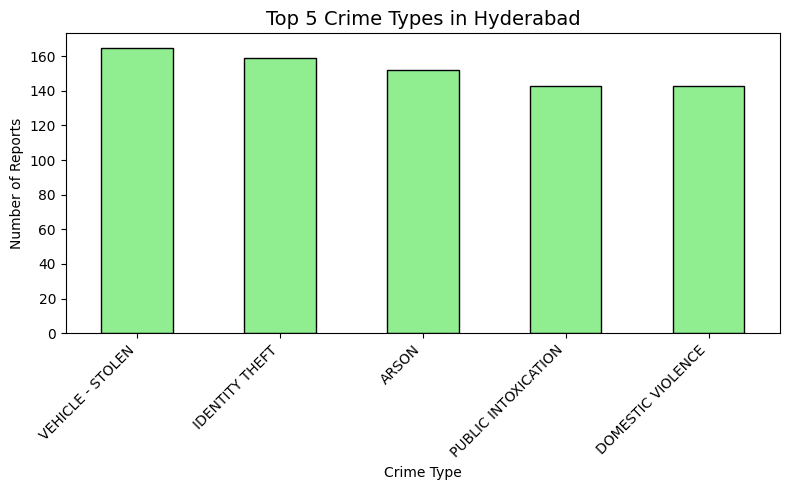

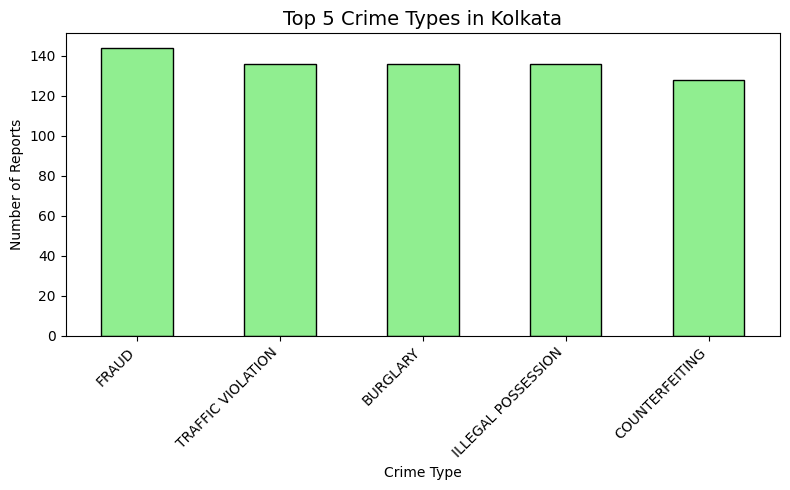

In [24]:
top_5_cities = df['City'].value_counts().head(5).index

for city in top_5_cities:
    city_data = df[df['City'] == city]['Crime Description'].value_counts().head(5)
    
    plt.figure(figsize=(8,5))
    city_data.plot(kind='bar', color='lightgreen', edgecolor='black')
    plt.title(f"Top 5 Crime Types in {city}", fontsize=14)
    plt.xlabel("Crime Type")
    plt.ylabel("Number of Reports")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from scipy.sparse import hstack
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import joblib


Logistic Regression Results:
Accuracy: 0.4972609561752988
Macro F1: 0.49712922283515826
Weighted F1: 0.49719002283830005
              precision    recall  f1-score   support

          No       0.50      0.51      0.51      4046
         Yes       0.49      0.48      0.49      3986

    accuracy                           0.50      8032
   macro avg       0.50      0.50      0.50      8032
weighted avg       0.50      0.50      0.50      8032


Decision Tree Results:
Accuracy: 0.5069721115537849
Macro F1: 0.5069669453047965
Weighted F1: 0.5069550231917466
              precision    recall  f1-score   support

          No       0.51      0.50      0.51      4046
         Yes       0.50      0.51      0.51      3986

    accuracy                           0.51      8032
   macro avg       0.51      0.51      0.51      8032
weighted avg       0.51      0.51      0.51      8032


Random Forest Results:
Accuracy: 0.50199203187251
Macro F1: 0.5019019754002086
Weighted F1: 0.501952006773709

C:\Users\Elston\AppData\Local\Temp\ipykernel_13168\1228027116.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=results_df, palette="viridis")


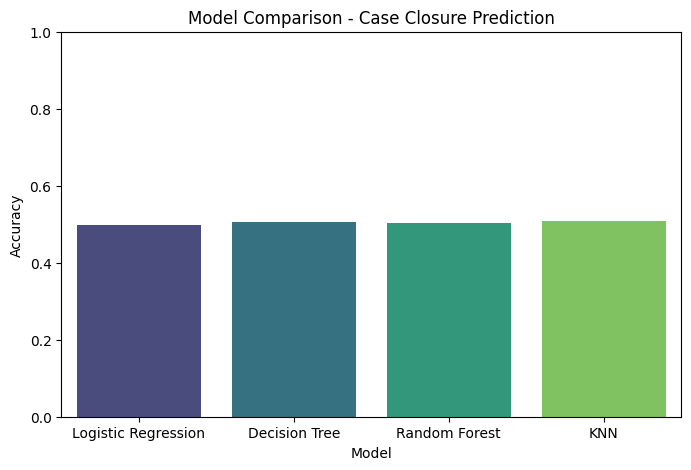

In [26]:
# Features & Target
features = ['City', 'Crime Description', 'Victim Age', 'Victim Gender', 'Weapon Used', 'Crime Domain', 'Police Deployed']
target = 'Case Closed'

X = df[features].copy()
y = df[target].copy()

# Column Transformer
preprocess = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), ['City', 'Victim Gender', 'Weapon Used', 'Crime Domain']),
    ("num", StandardScaler(), ['Victim Age', 'Police Deployed']),
    ("text", TfidfVectorizer(max_features=1000, stop_words="english"), 'Crime Description')
])

# Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight="balanced"),
    "Decision Tree": DecisionTreeClassifier(random_state=42, class_weight="balanced"),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced"),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train + Evaluate
results = []

for name, model in models.items():
    pipeline = Pipeline([
        ("preprocess", preprocess),
        ("clf", model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average="macro")
    f1_weighted = f1_score(y_test, y_pred, average="weighted")

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Macro F1": f1_macro,
        "Weighted F1": f1_weighted
    })

    print(f"\n{name} Results:")
    print("Accuracy:", acc)
    print("Macro F1:", f1_macro)
    print("Weighted F1:", f1_weighted)
    print(classification_report(y_test, y_pred, target_names=y.unique()))

# Results Table + Plot
results_df = pd.DataFrame(results)
print("\nModel Comparison:\n", results_df)

plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="Accuracy", data=results_df, palette="viridis")
plt.title("Model Comparison - Case Closure Prediction")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()


In [27]:
final_case_closure = Pipeline([
    ("preprocess", preprocess),
    ("clf", RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced"))
])

final_case_closure.fit(X, y)
joblib.dump(final_case_closure, "../models/case_closure.pkl")


['../models/case_closure.pkl']


Logistic Regression Results:
Accuracy: 1.0
Macro F1: 1.0
Weighted F1: 1.0
                  precision    recall  f1-score   support

   Violent Crime       1.00      1.00      1.00       737
     Other Crime       1.00      1.00      1.00      4580
   Fire Accident       1.00      1.00      1.00       393
Traffic Fatality       1.00      1.00      1.00      2322

        accuracy                           1.00      8032
       macro avg       1.00      1.00      1.00      8032
    weighted avg       1.00      1.00      1.00      8032


Decision Tree Results:
Accuracy: 1.0
Macro F1: 1.0
Weighted F1: 1.0
                  precision    recall  f1-score   support

   Violent Crime       1.00      1.00      1.00       737
     Other Crime       1.00      1.00      1.00      4580
   Fire Accident       1.00      1.00      1.00       393
Traffic Fatality       1.00      1.00      1.00      2322

        accuracy                           1.00      8032
       macro avg       1.00      1.00  

C:\Users\Elston\AppData\Local\Temp\ipykernel_13168\1149520995.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=results_df, palette="viridis")


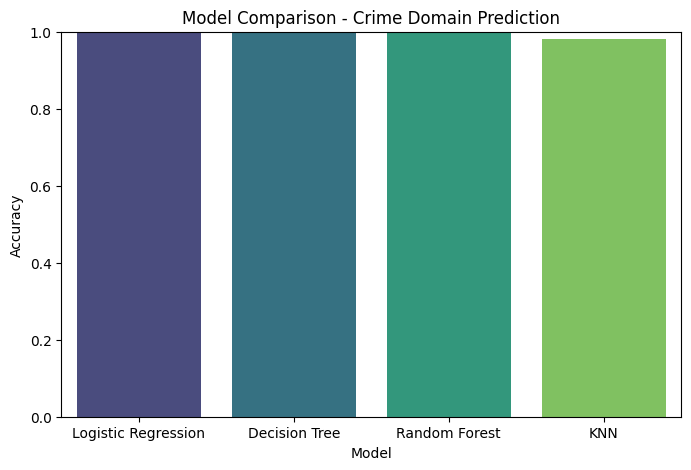

In [28]:
# Features & Target
features = ['City', 'Victim Age', 'Victim Gender', 'Weapon Used', 'Crime Description']
target = 'Crime Domain'

X = df[features].copy()
y = df[target].copy()

# Column Transformer
preprocess = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), ['City', 'Victim Gender', 'Weapon Used']),
    ("num", StandardScaler(), ['Victim Age']),
    ("text", TfidfVectorizer(max_features=1000, stop_words="english"), 'Crime Description')
])

# Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight="balanced"),
    "Decision Tree": DecisionTreeClassifier(random_state=42, class_weight="balanced"),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced"),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train + Evaluate
results = []

for name, model in models.items():
    pipeline = Pipeline([
        ("preprocess", preprocess),
        ("clf", model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average="macro")
    f1_weighted = f1_score(y_test, y_pred, average="weighted")

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Macro F1": f1_macro,
        "Weighted F1": f1_weighted
    })

    print(f"\n{name} Results:")
    print("Accuracy:", acc)
    print("Macro F1:", f1_macro)
    print("Weighted F1:", f1_weighted)
    print(classification_report(y_test, y_pred, target_names=y.unique()))

# Results Table + Plot
results_df = pd.DataFrame(results)
print("\nModel Comparison:\n", results_df)

plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="Accuracy", data=results_df, palette="viridis")
plt.title("Model Comparison - Crime Domain Prediction")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()


In [29]:
final_pipeline = Pipeline([
    ("preprocess", preprocess),
    ("clf", RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced"))
])

final_pipeline.fit(X, y)
joblib.dump(final_pipeline, "../models/crime_domain.pkl")

['../models/crime_domain.pkl']